<a href="https://colab.research.google.com/github/ArnoldoOliva/AprendizajeAutomatico/blob/main/Leyendo_BDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np

In [22]:
path="C:/Users/HUGO/Desktop/Maestria en CIENCIA DE DATOS UANL/Aprendizaje automatico/"
pd.set_option("display.max_columns",None)
loans=pd.read_csv("SBAnational.csv")
#NO SE PUDO CARGAR EL ARCHIVO POR CONFIGURACIONES DE GOOGLE DRIVE, ESTE PROBLEMA LO RESOLVERE EN LA PARTE 2 DE LA TAREA 
loans

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,60,6,1.0,0,0,1,0,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,60,6,1.0,0,0,1,0,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,108,26,1.0,0,0,1,0,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,60,6,1.0,0,0,1,0,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [ ]:
loans.info()

In [23]:
from datetime import datetime
datescolumns=[e for e in loans.columns if "Date" in e]
for e in datescolumns:
  loans[e]=pd.to_datetime(loans[e],errors="coerce")
loans.dtypes

LoanNr_ChkDgt                 int64
Name                         object
City                         object
State                        object
Zip                           int64
Bank                         object
BankState                    object
NAICS                         int64
ApprovalDate         datetime64[ns]
ApprovalFY                   object
Term                          int64
NoEmp                         int64
NewExist                    float64
CreateJob                     int64
RetainedJob                   int64
FranchiseCode                 int64
UrbanRural                    int64
RevLineCr                    object
LowDoc                       object
ChgOffDate           datetime64[ns]
DisbursementDate     datetime64[ns]
DisbursementGross            object
BalanceGross                 object
MIS_Status                   object
ChgOffPrinGr                 object
GrAppv                       object
SBA_Appv                     object
dtype: object

count                  899164
unique                   9859
top       1993-07-07 00:00:00
freq                     1131
first     1973-02-06 00:00:00
last      2072-12-08 00:00:00
Name: ApprovalDate, dtype: object


<ipython-input-12-9341f451a3af>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(loans['ApprovalDate'].describe() )


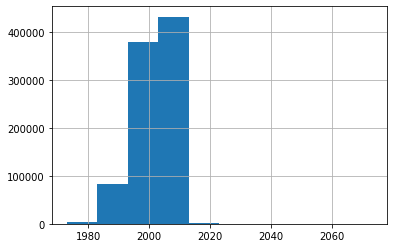

In [12]:
#To simplicity, as we don´t need all the information, we´ll cut the dataset to make it smaller for faster procedures:
print(loans['ApprovalDate'].describe() )
loans['ApprovalDate'].hist()

In [24]:
loans[loans['ApprovalDate']>"2023"] #parse errors
loans=loans[(loans["ApprovalDate"]>"2001")&(loans["ApprovalDate"]<"2015")]
loans

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
12,1000146010,CARVEL,APEX,NC,27502,STEARNS BK NATL ASSOC,MN,445299,2006-02-07,2006,162,2,2.0,0,0,15100,1,N,N,NaT,2006-03-31,"$253,400.00",$0.00,P I F,$0.00,"$253,400.00","$190,050.00"
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,722211,2006-02-07,2006,126,7,1.0,0,0,1,1,N,N,NaT,2006-04-30,"$137,300.00",$0.00,P I F,$0.00,"$137,300.00","$116,705.00"
28,1000506000,WEYLAND CORPORATION,CAMARILLO,CA,93010,WELLS FARGO BANK NATL ASSOC,SD,611110,2006-02-07,2006,83,18,2.0,5,23,1,1,Y,N,NaT,2006-02-28,"$438,541.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
30,1000516003,CHICAGO BRICK UNLIMITED INC,MIAMI,FL,33186,"CITIBANK, N.A.",FL,238140,2006-02-07,2006,84,4,1.0,0,4,1,1,Y,N,NaT,2006-02-28,"$51,440.00",$0.00,P I F,$0.00,"$35,000.00","$17,500.00"
32,1000526006,"RZI, INC.",NEW ORLEANS,LA,70130,BUSINESS RES. CAP. SPECIALTY B,LA,532490,2006-02-07,2006,60,3,1.0,0,0,1,1,N,N,NaT,2006-05-31,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$42,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894809,9898154001,ARTESIA CABINETS,LAS VEGAS,NV,89118,NEVADA ST. DEVEL CORP,NV,235510,2006-02-06,2006,240,20,1.0,15,0,1,1,0,N,NaT,2007-05-16,"$509,000.00",$0.00,P I F,$0.00,"$509,000.00","$509,000.00"
894814,9898254007,VDL MOTOR SPORTS LLC,VAIL,AZ,85641,COMPASS BANK,AL,512110,2006-02-06,2006,84,3,1.0,0,3,1,1,Y,N,NaT,2006-02-28,"$15,635.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
894832,9898734009,"SHADHESHWAIR MATAJI, INC",BRIDGEVIEW,IL,60455,"SOMERCOR 504, INC.",IL,721110,2006-02-06,2006,240,10,1.0,0,1,1,1,0,N,NaT,2006-04-12,"$1,038,000.00",$0.00,P I F,$0.00,"$1,038,000.00","$1,038,000.00"
896097,9928233007,PAK MAIL OF BURLINGTON #397,BURLINGTON,NC,27215,"READYCAP LENDING, LLC",CA,0,2007-01-29,2007,84,2,2.0,0,0,61400,0,0,N,NaT,1997-05-31,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"


In [27]:
#We don´t need some specific columns (like names, geographical specific locations, etc) so we will drop them :
dropcols=["Name","City","Zip","Bank","LoanNr_ChkDgt"]
cols=[e for e in loans.columns if e not in dropcols]
loans=loans[cols]
#loans.reset_index(inplace=True)
loans["index"]=loans.index
loans.rename(columns={"index":"ID"},inplace=True)
loans

,ID,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,0,NC,MN,445299,2006-02-07,2006,162,2,2.0,0,0,15100,1,N,N,NaT,2006-03-31,"$253,400.00",$0.00,P I F,$0.00,"$253,400.00","$190,050.00"
1,1,AR,MS,722211,2006-02-07,2006,126,7,1.0,0,0,1,1,N,N,NaT,2006-04-30,"$137,300.00",$0.00,P I F,$0.00,"$137,300.00","$116,705.00"
2,2,CA,SD,611110,2006-02-07,2006,83,18,2.0,5,23,1,1,Y,N,NaT,2006-02-28,"$438,541.00",$0.00,P I F,$0.00,"$100,000.00","$50,000.00"
3,3,FL,FL,238140,2006-02-07,2006,84,4,1.0,0,4,1,1,Y,N,NaT,2006-02-28,"$51,440.00",$0.00,P I F,$0.00,"$35,000.00","$17,500.00"
4,4,LA,LA,532490,2006-02-07,2006,60,3,1.0,0,0,1,1,N,N,NaT,2006-05-31,"$50,000.00",$0.00,P I F,$0.00,"$50,000.00","$42,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522606,522606,NV,NV,235510,2006-02-06,2006,240,20,1.0,15,0,1,1,0,N,NaT,2007-05-16,"$509,000.00",$0.00,P I F,$0.00,"$509,000.00","$509,000.00"
522607,522607,AZ,AL,512110,2006-02-06,2006,84,3,1.0,0,3,1,1,Y,N,NaT,2006-02-28,"$15,635.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
522608,522608,IL,IL,721110,2006-02-06,2006,240,10,1.0,0,1,1,1,0,N,NaT,2006-04-12,"$1,038,000.00",$0.00,P I F,$0.00,"$1,038,000.00","$1,038,000.00"
522609,522609,NC,CA,0,2007-01-29,2007,84,2,2.0,0,0,61400,0,0,N,NaT,1997-05-31,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"


In [ ]:
print(loans["State"].isna().sum())
loans["State"].value_counts()

In [35]:
"""
for e in range(len(loans)):
  if loans.loc[e,"State"]==loans.loc[e,"BankState"]:
    loans.loc[e,"same_state"]=1
  else:
    loans.loc[e,"same_state"]=0""" #took to long
loans["same_state"]=np.nan
loans.loc[loans["State"]==loans['BankState'],"same_state"]=1
loans.loc[loans["State"]!=loans['BankState'],"same_state"]=0

loans.drop(["State","BankState"],axis=1,inplace=True)
loans["same_state"].value_counts()

0.0    303200
1.0    219411
Name: same_state, dtype: int64

In [36]:
loans.drop("ApprovalFY",axis=1,inplace=True)

In [39]:
loans.isna().sum() #we can drop ChgOffDate disbursement Date as it can be replaced with misstatus
loans.drop("ChgOffDate",axis=1,inplace=True)

In [ ]:
loans["APPROVALtimestamp"] = loans.ApprovalDate.values.astype(np.int64) / 10 ** 9
loans["DISBURSEMENTtimestamp"] = loans.DisbursementDate.values.astype(np.int64) / 10 ** 9
loans["timediff"]=loans.DISBURSEMENTtimestamp-loans.APPROVALtimestamp
loans

In [46]:
print(loans["MIS_Status"].value_counts())
loans.rename(columns={"MIS_Status":"paid"},inplace=True)
loans.loc[loans["paid"]=="P I F"]=1
loans.loc[loans["paid"]=="CHGOFF"]=0
print(loans["paid"].value_counts())

P I F     390998
CHGOFF    129985
Name: MIS_Status, dtype: int64
1    390998
0    129985
Name: paid, dtype: int64


In [47]:
nonpaid=loans[loans["paid"]==0]
paid=loans[loans["paid"]==1]

In [48]:
loans_train = loans.sample(frac = 0.7)
x_train = loans_train.loc[:, loans_train.columns != 'paid']
y_train = loans_train[['paid']]

In [49]:
loans_valtest = loans.drop(loans_train.index)
loans_val=loans_valtest.sample(frac=0.4)            #deje un espacio para un validation set, no lo defini completamente porque no se si usarlo
loans_test=loans_valtest.drop(loans_val.index)
x_test = loans_test.loc[:, loans_test.columns != 'paid']
y_test = loans_test[['paid']]

In [50]:
print("x_train dim:",x_train.shape)
print("y_train dim:",len(y_train))
print("x_test dim:",x_test.shape)
print("y_test dim:",len(y_test))
print("validation dim:",(loans_valtest.shape))


x_train dim: (365828, 22)
y_train dim: 365828
x_test dim: (94070, 22)
y_test dim: 94070
validation dim: (156783, 23)


In [51]:
print(len(loans))
len(loans_train)+len(loans_test)+len(loans_val)

522611


522611